In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [2]:
transit_df = pd.read_csv("../data/headway_data_with_routes.csv", index_col = 0)

In [3]:
#Creating arrival status list
arrival_status_col = []

for time in transit_df["ADHERENCE"]:
    if math.isnan(time) == True:
        arrival_status = float('nan')
    elif time > 1:
        arrival_status = 'EARLY'
    elif time <= 1 and time >= -6:
        arrival_status = 'ON TIME'
    elif time < -6:
        arrival_status = 'LATE'
    #else:
        arrival_status = None
    #arrival_status_col.append(arrival_status)

#Creating arrival status column
#transit_df['ARRIVAL_STATUS'] = arrival_status_col

#Function to update arrival columns
#def update_arrival_status(row):
#    if row['ADJUSTED_EARLY_COUNT'] == 1:
#        return 'EARLY'
#    elif row['ADJUSTED_ONTIME_COUNT'] == 1:
#        return 'ON TIME'
#    elif row['ADJUSTED_LATE_COUNT'] == 1:
#        return 'LATE'
#    else:
#        return row['ARRIVAL_STATUS']

#Applying the function
#transit_df['ARRIVAL_STATUS'] = transit_df.apply(update_arrival_status, axis=1)

In [4]:
transit_df.dtypes

SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                    object
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
IS_RELIEF                      int64
B

In [5]:
#Creating Acceptable_HDWY
acceptable_hdwy_col = []

for dev, schedule in (transit_df[['HDWY_DEV','SCHEDULED_HDWY']]).itertuples(index = False):
    if math.isnan(dev) == True:
        acceptable_hdwy = float('nan')
    elif abs(dev) <= 0.5*schedule:
        acceptable_hdwy = 'ACCEPTABLE'
    elif (abs(dev) > 0.5*schedule) and dev < 0:
        acceptable_hdwy = 'BUNCHING'
    elif (abs(dev) > 0.5*schedule) and dev > 0:
        acceptable_hdwy = 'GAPPING'
    acceptable_hdwy_col.append(acceptable_hdwy)

#Creating the column
transit_df['ACCEPTABLE_HDWY'] = acceptable_hdwy_col

In [6]:
transit_df.isna().sum()

SERVICE_ABBR                     0
ADHERENCE_ID                     0
DATE                             0
ROUTE_ABBR                       0
BLOCK_ABBR                       0
OPERATOR                         0
TRIP_ID                          0
OVERLOAD_ID                      0
ROUTE_DIRECTION_NAME             0
TIME_POINT_ABBR                  0
ROUTE_STOP_SEQUENCE             11
TRIP_EDGE                        0
LATITUDE                         0
LONGITUDE                        0
SCHEDULED_TIME                   0
ACTUAL_ARRIVAL_TIME          11459
ACTUAL_DEPARTURE_TIME        11468
ADHERENCE                    11468
SCHEDULED_HDWY               75591
ACTUAL_HDWY                  84267
HDWY_DEV                     84436
ADJUSTED_EARLY_COUNT             0
ADJUSTED_LATE_COUNT              0
ADJUSTED_ONTIME_COUNT            0
STOP_CANCELLED                   0
PREV_SCHED_STOP_CANCELLED    70329
IS_RELIEF                        0
BLOCK_STOP_ORDER                 0
DWELL_IN_MINS       

In [7]:
#transit_df.to_csv("../data/headway_data_with_routes.csv")

In [8]:
transit_df.head()

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY
0,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,ON TIME,NaN
1,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,ON TIME,NaN
2,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,ON TIME,NaN
3,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,ON TIME,NaN
4,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,ON TIME,NaN


In [9]:
transit_df.isna().sum()

SERVICE_ABBR                     0
ADHERENCE_ID                     0
DATE                             0
ROUTE_ABBR                       0
BLOCK_ABBR                       0
OPERATOR                         0
TRIP_ID                          0
OVERLOAD_ID                      0
ROUTE_DIRECTION_NAME             0
TIME_POINT_ABBR                  0
ROUTE_STOP_SEQUENCE             11
TRIP_EDGE                        0
LATITUDE                         0
LONGITUDE                        0
SCHEDULED_TIME                   0
ACTUAL_ARRIVAL_TIME          11459
ACTUAL_DEPARTURE_TIME        11468
ADHERENCE                    11468
SCHEDULED_HDWY               75591
ACTUAL_HDWY                  84267
HDWY_DEV                     84436
ADJUSTED_EARLY_COUNT             0
ADJUSTED_LATE_COUNT              0
ADJUSTED_ONTIME_COUNT            0
STOP_CANCELLED                   0
PREV_SCHED_STOP_CANCELLED    70329
IS_RELIEF                        0
BLOCK_STOP_ORDER                 0
DWELL_IN_MINS       

In [10]:
transit_df['ARRIVAL_STATUS'].value_counts()

ARRIVAL_STATUS
ON TIME    270047
LATE        59038
EARLY        9775
Name: count, dtype: int64

**Question 5**. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [11]:
transit_df['ADHERENCE']

0         -2.133333
1         -2.450000
2         -0.933333
3          6.283333
4         -1.583333
            ...    
350323    -8.433333
350324   -11.300000
350325    -4.316666
350326   -22.083333
350327   -23.666666
Name: ADHERENCE, Length: 350328, dtype: float64

In [12]:
transit_df['ARRIVAL_STATUS'].value_counts(normalize = True)

ARRIVAL_STATUS
ON TIME    0.796928
LATE       0.174225
EARLY      0.028847
Name: proportion, dtype: float64

In [13]:
transit_df['ARRIVAL_STATUS']

0         ON TIME
1         ON TIME
2         ON TIME
3         ON TIME
4         ON TIME
           ...   
350323       LATE
350324       LATE
350325    ON TIME
350326       LATE
350327       LATE
Name: ARRIVAL_STATUS, Length: 350328, dtype: object

Breakdown questions:
- Figure out how many drivers
- Top 5 drivers in dataframe
- Remove all duplicate Trip IDs and rerun top drivers
- On average how many trips does a driver take a day
- Split up dataframe by early, on-time, and late. 
- Determine % of on time for each operator and graph top

In [14]:
#How many drivers
transit_df['OPERATOR'].nunique()

341

In [15]:
#Top 5 drivers that appear
transit_df['OPERATOR'].value_counts().head()

OPERATOR
2352    2970
1266    2911
1147    2710
1133    2625
2424    2577
Name: count, dtype: int64

In [16]:
#How many trips
transit_df['TRIP_ID'].nunique()

3987

Dropping duplicate trip_ids doesn't work because the trip ID resets at the beginning of the next day

In [17]:
#Dropping duplicate trip_ids to find the unique trips
#unique_trips = transit_df.drop_duplicates(subset = 'TRIP_ID')
#unique_trips

In [18]:
transit_df['DATE_STR'] = transit_df['DATE'].astype(str)
transit_df['TRIP_ID_STR'] = transit_df['TRIP_ID'].astype(str)
transit_df['CORRECTED_TRIP_ID'] = transit_df['DATE_STR'] + '-' + transit_df['TRIP_ID_STR']
transit_df = transit_df.drop(columns = ['DATE_STR','TRIP_ID_STR'])
transit_df

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID
0,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,ON TIME,NaN,2023-08-01-345104
1,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,ON TIME,NaN,2023-08-01-345104
2,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,04:54:56,04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,ON TIME,NaN,2023-08-01-345104
3,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,05:03:43,05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,ON TIME,NaN,2023-08-01-345104
4,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,ON TIME,NaN,2023-08-01-345105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,2,100406610,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,22:23:00,22:31:26,22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000,LATE,ACCEPTABLE,2023-09-30-353448
350324,2,100406611,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,22:38:00,22:49:18,22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000,LATE,NaN,2023-09-30-353448
350325,2,100406612,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,22:45:00,22:49:19,22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000,ON TIME,ACCEPTABLE,2023-09-30-353449
350326,2,100406613,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,22:59:00,23:21:05,23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000,LATE,GAPPING,2023-09-30-353449


In [19]:
transit_df['CORRECTED_TRIP_ID'].nunique()

67370

In [20]:
unique_trips = transit_df.drop_duplicates(subset = 'CORRECTED_TRIP_ID')
unique_trips

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID
0,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,ON TIME,NaN,2023-08-01-345104
4,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,05:15:00,05:03:43,05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,ON TIME,NaN,2023-08-01-345105
7,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,05:42:00,05:30:30,05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,ON TIME,ACCEPTABLE,2023-08-01-345106
11,1,99457901,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,06:15:00,06:05:31,06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,ON TIME,ACCEPTABLE,2023-08-01-345107
14,1,99457904,2023-08-01,BORDEAUX,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,06:42:00,06:30:59,06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,124,12.533333,ON TIME,ACCEPTABLE,2023-08-01-345108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350313,2,100406600,2023-09-30,HILLSBORO,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,20:45:00,20:40:02,20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,456,8.250000,ON TIME,ACCEPTABLE,2023-09-30-353445
350316,2,100406603,2023-09-30,HILLSBORO,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,21:16:00,21:12:40,21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,482,4.183333,ON TIME,ACCEPTABLE,2023-09-30-353446
350319,2,100406606,2023-09-30,HILLSBORO,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,21:45:00,21:43:52,21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,504,7.033333,ON TIME,ACCEPTABLE,2023-09-30-353447
350322,2,100406609,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,22:16:00,22:22:39,22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,530,1.966666,LATE,ACCEPTABLE,2023-09-30-353448


In [21]:
unique_trips['OPERATOR'].value_counts().head()

OPERATOR
1762    799
1761    735
2164    573
379     548
2352    546
Name: count, dtype: int64

In [22]:
#How many trips does a driver take a day?
trips_by_operator = unique_trips.groupby(['OPERATOR','DATE'])
trips_by_operator.count()['TRIP_ID'].mean()

8.629435122326118

In [23]:
#Subset dataframe for Operators with at least 10 trips
plus_10_operators = trips_by_operator.count().query("TRIP_ID >= 10 ").reset_index()
print("There are " + str(plus_10_operators['OPERATOR'].nunique()) + " operators with over 10 trips")
print("There are " + str(transit_df['OPERATOR'].nunique()) + " operators in total")
print("So " + str(round((((plus_10_operators['OPERATOR'].nunique())/(transit_df['OPERATOR'].nunique())*100)),0)) + "% of operators drove over 10 trips")

There are 224 operators with over 10 trips
There are 341 operators in total
So 66.0% of operators drove over 10 trips


In [24]:
plus_10_operators

,OPERATOR,DATE,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID
0,304,2023-08-01,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,304,2023-08-02,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,304,2023-08-03,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
3,304,2023-08-06,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
4,304,2023-08-07,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,3156,2023-09-10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2526,3156,2023-09-11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2527,3156,2023-09-12,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2528,3156,2023-09-13,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [25]:
headway_clean = transit_df.dropna(subset= 'HDWY_DEV')

In [26]:
adherence_clean = transit_df.dropna(subset = 'ADHERENCE')

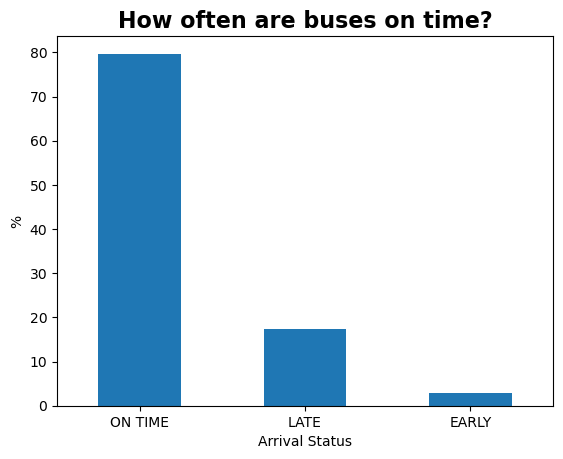

In [27]:
# Plot the Arrival Status as percentage
arrival_status_pct = round(adherence_clean['ARRIVAL_STATUS'].value_counts(normalize = True)*100,1)
arrival_status_pct.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Arrival Status')
plt.ylabel('%')
plt.title('How often are buses on time?', fontweight = 'bold', fontsize = 16);

Text(0, 0.5, '%')

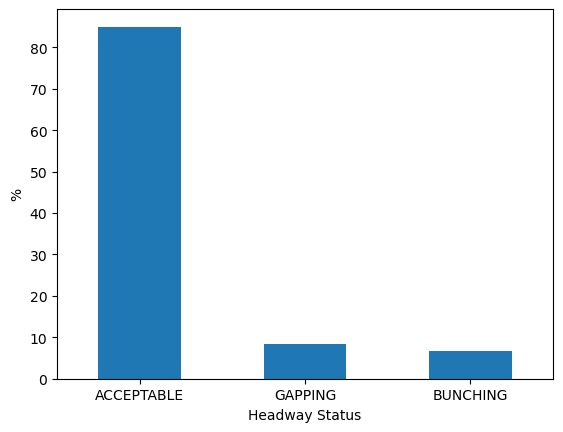

In [72]:
headway_clean_pct = round(headway_clean['ACCEPTABLE_HDWY'].value_counts(normalize = True) *100,1)
headway_clean_pct.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Headway Status')
plt.ylabel('%')


In [58]:
arrival_status_pct

ARRIVAL_STATUS
ON TIME    79.7
LATE       17.4
EARLY       2.9
Name: proportion, dtype: float64

In [28]:
adherence_clean.columns

Index(['SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR', 'BLOCK_ABBR',
       'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID', 'ROUTE_DIRECTION_NAME',
       'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE', 'TRIP_EDGE', 'LATITUDE',
       'LONGITUDE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME',
       'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY',
       'HDWY_DEV', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT',
       'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED', 'PREV_SCHED_STOP_CANCELLED',
       'IS_RELIEF', 'BLOCK_STOP_ORDER', 'DWELL_IN_MINS', 'ARRIVAL_STATUS',
       'ACCEPTABLE_HDWY', 'CORRECTED_TRIP_ID'],
      dtype='object')

In [29]:
#I want an on time % for each operator

In [30]:
adherence_clean['ACCEPTABLE_HDWY'].value_counts()

ACCEPTABLE_HDWY
ACCEPTABLE    225920
GAPPING        21973
BUNCHING       17999
Name: count, dtype: int64

In [43]:
on_time_counts = []
for status in adherence_clean['ARRIVAL_STATUS']:
    if status == 'ON TIME':
        on_time_count = 1
    else:
        on_time_count = float('nan')
    on_time_counts.append(on_time_count)
adherence_clean['ON_TIME'] = on_time_counts


acceptable_headway_counts = []
for status in headway_clean['ACCEPTABLE_HDWY']:
    if status == 'ACCEPTABLE':
        acceptable_headway_count = 1
    else:
        acceptable_headway_count = float('nan')
    acceptable_headway_counts.append(acceptable_headway_count)
headway_clean['HDWY_STATUS'] = acceptable_headway_counts

C:\Users\kidsa\AppData\Local\Temp\ipykernel_6960\3859513565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adherence_clean['ON_TIME'] = on_time_counts
C:\Users\kidsa\AppData\Local\Temp\ipykernel_6960\3859513565.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headway_clean['HDWY_STATUS'] = acceptable_headway_counts


In [44]:
#Need a dataframe where there's arrival status
arrival_status_clean = transit_df.dropna(subset = 'ARRIVAL_STATUS')

In [48]:
adherence_operator_counts = adherence_clean.groupby('OPERATOR').count()
adherence_operator_counts['ON_TIME_PCT'] =(adherence_operator_counts['ON_TIME']/adherence_operator_counts['TRIP_ID'])*100

In [49]:
adherence_operator_counts

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID,HDWY_STATUS,ON_TIME,ON_TIME_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,1,100.000000
56,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,3,2,3,3,3,3,2,3,2,3,100.000000
235,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,9,9,9,12,12,12,12,9,12,12,12,12,9,12,7,6,50.000000
244,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,20,20,20,25,25,25,25,20,25,25,25,25,20,25,13,20,80.000000
301,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,30,30,30,37,37,37,37,30,37,37,37,37,30,37,16,19,51.351351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,57,56,56,88,88,88,88,66,88,88,88,88,56,88,52,76,86.363636
3156,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,230,233,230,290,290,290,290,233,290,290,290,290,230,290,220,219,75.517241
3165,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,24,24,24,32,32,32,32,24,32,32,32,32,24,32,16,12,37.500000


In [50]:
headway_operator_counts = headway_clean.groupby("OPERATOR").count()

headway_operator_counts['ACCEPTABLE_HEADWAY_PCT'] =(headway_operator_counts['HDWY_STATUS']/headway_operator_counts['TRIP_ID'])*100

In [51]:
headway_operator_counts

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID,ON_TIME,HDWY_STATUS,ACCEPTABLE_HEADWAY_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,100.000000
235,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,5,7,77.777778
244,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,16,13,65.000000
301,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,17,16,53.333333
304,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,1788,1901,93.830207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,45,52,92.857143
3156,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,174,220,95.652174
3165,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,8,16,66.666667


<Axes: xlabel='TRIP_ID', ylabel='ON_TIME_PCT'>

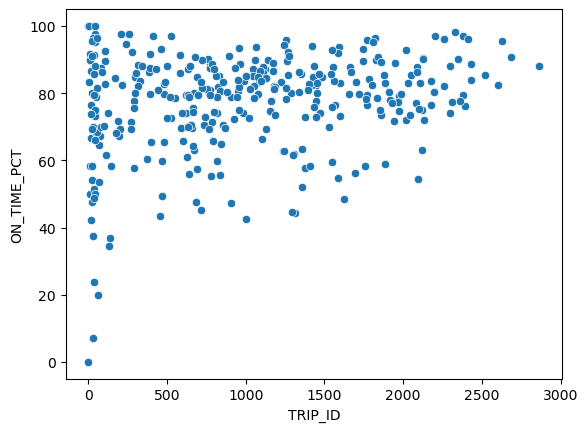

In [53]:
sns.scatterplot(data = adherence_operator_counts, x = 'TRIP_ID', y = 'ON_TIME_PCT')

<Axes: xlabel='TRIP_ID', ylabel='ACCEPTABLE_HEADWAY_PCT'>

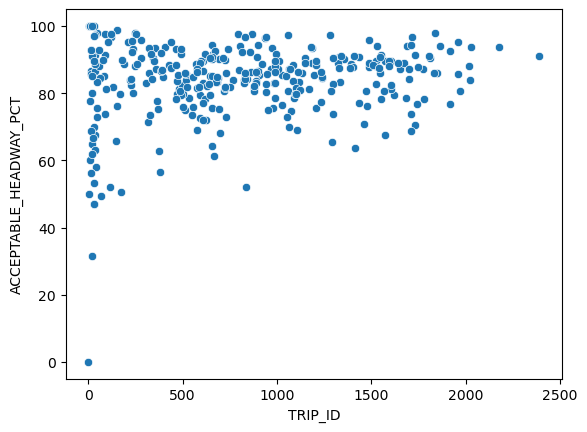

In [54]:
sns.scatterplot(data = headway_operator_counts, x = 'TRIP_ID', y = 'ACCEPTABLE_HEADWAY_PCT')

In [60]:
adherence_operator_counts['ON_TIME_PCT'].describe()

count    341.000000
mean      76.942911
std       15.290272
min        0.000000
25%       70.409357
50%       80.082702
75%       87.068966
max      100.000000
Name: ON_TIME_PCT, dtype: float64

In [57]:
adherence_operator_counts.query("ON_TIME_PCT == 100")

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID,HDWY_STATUS,ON_TIME,ON_TIME_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,1,100.0
56,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,3,2,3,3,3,3,2,3,2,3,100.0
2294,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,28,28,28,45,45,45,45,36,45,45,45,45,28,45,28,45,100.0


3 Operators were on time for 100% of their TRIPS. 2 of them had less than 5 trips but operator 2294 was on-time 100% of the time with 45 trips.

In [63]:
adherence_operator_counts.query('ON_TIME_PCT >= 79.7').count()['TRIP_ID']

177

In [64]:
177/341

0.5190615835777126

In [73]:
adherence_operator_counts.query("ON_TIME_PCT < 40")

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID,HDWY_STATUS,ON_TIME,ON_TIME_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
473,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,0.000000
656,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.000000
1016,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,115,115,115,138,138,138,138,118,138,138,138,138,115,138,60,51,36.956522
1377,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0,0,0,60,60,60,60,30,60,60,60,60,0,60,0,12,20.000000
2094,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,32,32,32,38,38,38,38,32,38,38,38,38,32,38,15,9,23.684211
2400,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,69,69,69,130,130,130,130,94,130,130,130,130,69,130,34,45,34.615385
2982,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,19,19,19,28,28,28,28,19,28,28,28,28,19,28,6,2,7.142857
3165,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,24,24,24,32,32,32,32,24,32,32,32,32,24,32,16,12,37.500000


In [68]:
headway_operator_counts['ACCEPTABLE_HEADWAY_PCT'].describe()

count    334.000000
mean      83.620635
std       11.366876
min        0.000000
25%       79.803962
50%       85.889131
75%       90.428604
max      100.000000
Name: ACCEPTABLE_HEADWAY_PCT, dtype: float64

In [69]:
headway_operator_counts.query("ACCEPTABLE_HEADWAY_PCT == 100")

,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ACCEPTABLE_HDWY,CORRECTED_TRIP_ID,ON_TIME,HDWY_STATUS,ACCEPTABLE_HEADWAY_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,100.0
2294,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,100.0
2313,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,8,100.0
2377,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,100.0
2472,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,100.0
2494,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,25,28,100.0
3077,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6,10,100.0
3118,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,11,20,100.0


I wonder if the ON_TIME_PCT is more dependent on the location

**Question 6**. How does direction of travel, route, or location affect the headway and on-time performance?